In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### import sheet

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', header=0)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### deal with data, work out the number of survival in total, and observation

In [5]:
# delete useless imformation
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


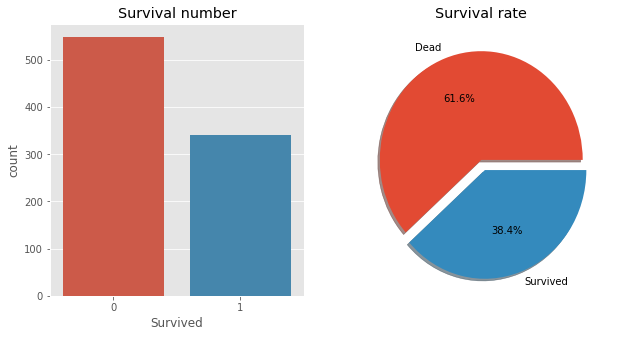

In [7]:
plt.style.use('ggplot')

total_survived_num = df['Survived'].sum()
total_dead_num = 891 - total_survived_num

plt.figure(figsize = (10,5))

plt.subplot(121)
plt.style.use('ggplot')    
sns.countplot(x='Survived',data=df)
plt.title('Survival number')

plt.subplot(122)            
expl = [0,0.1]      
plt.pie([total_dead_num, total_survived_num], explode=expl,labels=['Dead','Survived'],autopct='%1.1f%%', shadow=True)
plt.title('Survival rate') 

plt.show()

### 1 variable

In [8]:
df['AgeRange'] = pd.cut(df['Age'], [0, 16, 65, 80], labels=['Child', 'Adult', 'Elderly'])
survived_age = df.groupby('AgeRange')['Survived'].mean()
survived_sex = df.groupby('Sex')['Survived'].mean()
survived_class = df.groupby('Pclass')['Survived'].mean()

(0.0, 1.0)

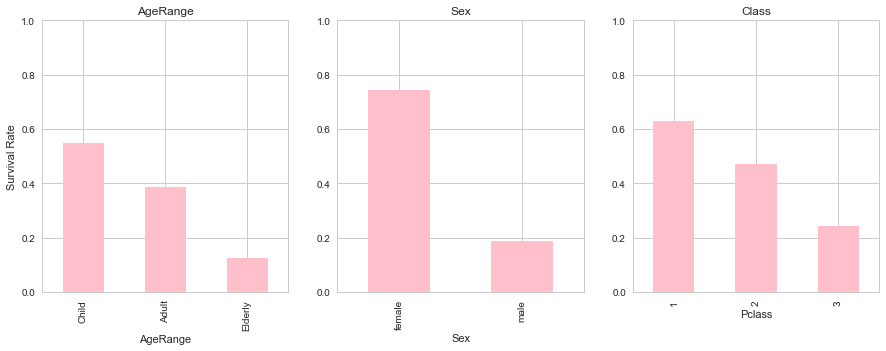

In [21]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(15,5))
ax = survived_age.plot.bar(ax=axis1, color='pink', title='AgeRange')
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_sex.plot.bar(ax=axis2, color='pink', title='Sex')
ax.set_ylim(0.0,1.0)
ax = survived_class.plot.bar(ax=axis3, color='pink', title='Class')
ax.set_ylim(0.0,1.0)

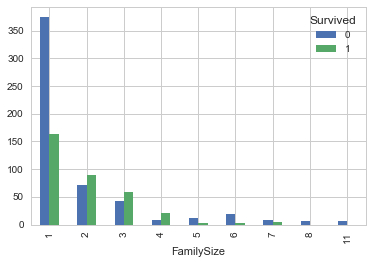

In [47]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
pd.crosstab(df['FamilySize'],df['Survived']).plot(kind='bar')
plt.show()

### 2 variables

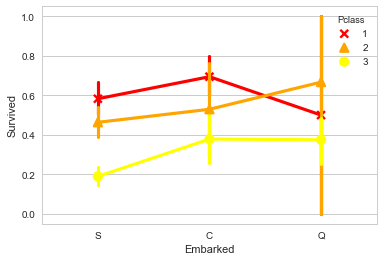

In [33]:
sns.set(style='whitegrid')  
sns.pointplot(x='Embarked', y='Survived', hue='Pclass', data=df,
              palette={1: 'red', 2: 'orange', 3: 'yellow'},
              markers=['x','^','o'], linestyles=['-','-','-']);

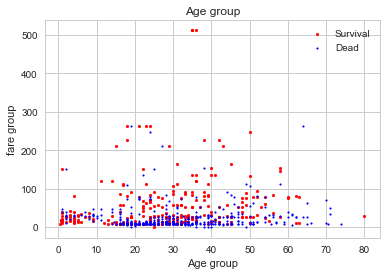

In [49]:
fig, ax = plt.subplots()

xlive = df.Age[df.Survived==1]
xdie = df.Age[df.Survived==0]
ylive = df.Fare[df.Survived==1]
ydie = df.Fare[df.Survived==0]
ax.set_xlabel('Age group')
ax.set_ylabel('fare group')
m = ax.scatter(xlive, ylive, 8, 'red')
ax.hold
n = ax.scatter(xdie, ydie, 3, 'blue')
ax.hold
ax.legend([m,n],['Survival','Dead'])
plt.title('Age group') 

plt.show()